# 5. Introduction of Pandas

In [2]:
import pandas as pd

## 5.1 Create a dataframe

In [39]:
abc_df = pd.DataFrame({'AAA': [4,5,6,7], 'BBB': [10,20,30,40], 'CCC': [100,50,-30,-50]})
abc_df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


### Use dot to get the values in the column

In [40]:
abc_df.AAA

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [41]:
abc_df.BBB

0    10
1    20
2    30
3    40
Name: BBB, dtype: int64

In [42]:
abc_df['BBB']

0    10
1    20
2    30
3    40
Name: BBB, dtype: int64

### Selecting pandas data using “iloc”
```python
Usage: dataframe.iloc[row-index, column-index]
```

In [81]:
stock_df = pd.DataFrame(
    data=[[0.35, 0.06, 0.2, 0.18],
         [0.28, 0.19, 0.23, 0.18],
         [0.7, 0.11, 0.14, 0.57],
         [2.56, 3.38, 3.86, 3.73],
         [1.03, 1.63, 3.98, 2.0]],
    columns=['2017Q2', '2017Q1', '2016Q4', '2016Q3'],
    index=['2337', '2344', '3019', '2330', '2317']
)
stock_df

,2017Q2,2017Q1,2016Q4,2016Q3
2337,0.35,0.06,0.20,0.18
2344,0.28,0.19,0.23,0.18
3019,0.70,0.11,0.14,0.57
2330,2.56,3.38,3.86,3.73
2317,1.03,1.63,3.98,2.00


In [67]:
stock_df.iloc[1]  # Select row1: 2344

2017Q2    0.28
2017Q1    0.19
2016Q4    0.23
2016Q3    0.18
Name: 2344, dtype: float64

In [68]:
stock_df.iloc[:, 0:2]  # Select column0 and column1

,2017Q2,2017Q1
2337,0.35,0.06
2344,0.28,0.19
3019,0.70,0.11
2330,2.56,3.38
2317,1.03,1.63


In [69]:
stock_df.iloc[1, 0:2]  # Select row1, column0 and column1

2017Q2    0.28
2017Q1    0.19
Name: 2344, dtype: float64

In [70]:
stock_df.iloc[-1]   # Select last row

2017Q2    1.03
2017Q1    1.63
2016Q4    3.98
2016Q3    2.00
Name: 2317, dtype: float64

### Selecting pandas data using “loc”
```python
Usage: dataframe.loc[row-name, column-name]
```

In [71]:
stock_df.loc['2344']  # Select row: 2344

2017Q2    0.28
2017Q1    0.19
2016Q4    0.23
2016Q3    0.18
Name: 2344, dtype: float64

In [72]:
stock_df.loc[:,['2017Q2', '2017Q1']]  # Select column 2017Q2 and column 2017Q1

,2017Q2,2017Q1
2337,0.35,0.06
2344,0.28,0.19
3019,0.70,0.11
2330,2.56,3.38
2317,1.03,1.63


In [73]:
stock_df.loc[['2344'], ['2017Q2', '2017Q1']]  # Select row 2344, column 2017Q2 and column 2017Q1

,2017Q2,2017Q1
2344,0.28,0.19


### Boolean / Logical indexing using .loc

In [74]:
stock_df.loc[df['2017Q2'] > 0.5]  # Select the values in column 2017Q2 greater than 0.5

,2017Q2,2017Q1,2016Q4,2016Q3
3019,0.70,0.11,0.14,0.57
2330,2.56,3.38,3.86,3.73
2317,1.03,1.63,3.98,2.00


In [75]:
stock_df.loc[df['2017Q2'] > 0.5, ['2017Q2', '2017Q1']]

,2017Q2,2017Q1
3019,0.70,0.11
2330,2.56,3.38
2317,1.03,1.63


In [76]:
abc_df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [77]:
abc_df.loc[abc_df.AAA >= 5,'BBB'] = -1
abc_df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,555
2,6,-1,555
3,7,-1,555


In [78]:
abc_df.loc[abc_df.AAA >= 5,['BBB','CCC']] = 555
abc_df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


### Add a new column

In [83]:
stock_df['name'] = ['旺宏', '華邦電', '亞光', '台積電', '鴻海']
stock_df

,2017Q2,2017Q1,2016Q4,2016Q3,name
2337,0.35,0.06,0.20,0.18,旺宏
2344,0.28,0.19,0.23,0.18,華邦電
3019,0.70,0.11,0.14,0.57,亞光
2330,2.56,3.38,3.86,3.73,台積電
2317,1.03,1.63,3.98,2.00,鴻海


### Calculate by columns

In [97]:
abc_df['DDD'] = (abc_df.BBB - abc_df.CCC)*2
abc_df

,AAA,BBB,CCC,DDD
0,4,10,100,-180
1,5,555,555,0
2,6,555,555,0
3,7,555,555,0


In [102]:
abc_df['sum'] = abc_df.sum(1)
abc_df

,AAA,BBB,CCC,DDD,sum
0,4,10,100,-180,-66.0
1,5,555,555,0,1115.0
2,6,555,555,0,1116.0
3,7,555,555,0,1117.0


### Concat two dataframe

In [92]:
stock_df2 = pd.DataFrame(
    data=[[0.17, 0.19, 0.21, 0.24, '聯電']],
    columns=['2017Q2', '2017Q1', '2016Q4', '2016Q3', 'name'],
    index=['2303']
)

In [93]:
new_stock_df = pd.concat([stock_df, stock_df2], axis=0)
new_stock_df

,2017Q2,2017Q1,2016Q4,2016Q3,name
2337,0.35,0.06,0.20,0.18,旺宏
2344,0.28,0.19,0.23,0.18,華邦電
3019,0.70,0.11,0.14,0.57,亞光
2330,2.56,3.38,3.86,3.73,台積電
2317,1.03,1.63,3.98,2.00,鴻海
2303,0.17,0.19,0.21,0.24,聯電


### Sortng

In [103]:
new_stock_df.sort_values(by=["2017Q2"], ascending=False)

,2017Q2,2017Q1,2016Q4,2016Q3,name
2330,2.56,3.38,3.86,3.73,台積電
2317,1.03,1.63,3.98,2.00,鴻海
3019,0.70,0.11,0.14,0.57,亞光
2337,0.35,0.06,0.20,0.18,旺宏
2344,0.28,0.19,0.23,0.18,華邦電
2303,0.17,0.19,0.21,0.24,聯電


### Transpose

In [127]:
df = new_stock_df.T
df

,2337,2344,3019,2330,2317,2303
2017Q2,0.35,0.28,0.70,2.56,1.03,0.17
2017Q1,0.06,0.19,0.11,3.38,1.63,0.19
2016Q4,0.20,0.23,0.14,3.86,3.98,0.21
2016Q3,0.18,0.18,0.57,3.73,2.00,0.24


### Delete column and row

In [125]:
df = df.drop(df.index[[-1]])
df

,2337,2344,3019,2330,2317,2303
2017Q2,0.35,0.28,0.7,2.56,1.03,0.17
2017Q1,0.06,0.19,0.11,3.38,1.63,0.19
2016Q4,0.2,0.23,0.14,3.86,3.98,0.21


In [126]:
del df['2303']
df

,2337,2344,3019,2330,2317
2017Q2,0.35,0.28,0.7,2.56,1.03
2017Q1,0.06,0.19,0.11,3.38,1.63
2016Q4,0.2,0.23,0.14,3.86,3.98


## 5.2 Create dataframe from csv

In [47]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../data/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
users.tail()

In [48]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('../data/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [49]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('../data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [ ]:
movies.head(10)

In [ ]:
movies[100:110]

## 5.3 Basic Analysis

In [50]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [51]:
ratings.rating.max()

5

In [52]:
ratings.rating.min()

1

In [53]:
ratings.rating.std()

1.1256735991443161

In [54]:
ratings.rating.mean()

3.5298600000000002

In [55]:
ratings.rating.median()

4.0

In [56]:
ratings.count()

user_id           100000
movie_id          100000
rating            100000
unix_timestamp    100000
dtype: int64

### Number of unique users

In [62]:
ratings.user_id.nunique()

943

### Count for each rating

In [63]:
ratings.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

## 5.4 Ploting

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

In [128]:
df

,2337,2344,3019,2330,2317,2303
2017Q2,0.35,0.28,0.70,2.56,1.03,0.17
2017Q1,0.06,0.19,0.11,3.38,1.63,0.19
2016Q4,0.20,0.23,0.14,3.86,3.98,0.21
2016Q3,0.18,0.18,0.57,3.73,2.00,0.24


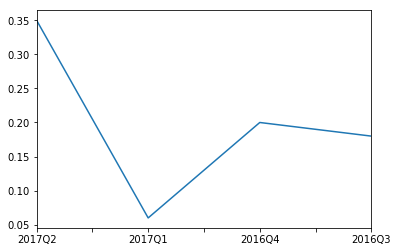

In [129]:
df['2337'].plot()

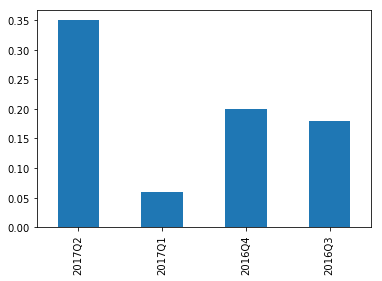

In [135]:
df['2337'].plot(kind='bar')

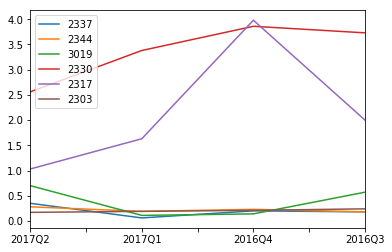

In [137]:
df.plot()

## Exercise 5.1 Add a new price column for stock dataframe and sort by price

## Exercise 5.2 Add new stocks for your stock dataframe

## Exercise 5.3 Find the number of unique movies

## Exercise 5.4 Find the top 5 most rated movies and add a new column 'name'

## Exercise 5.5 Use pandas to count the jobNo and action from csv (Same as exercise 4.3) 